<h1><b><center>Korisnici kreditnih kartica</center></b><h1>
<h2><center>1.Uvod</center></h2>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [2]:
##%Prepremna podaka za analizu
kartice=pd.read_csv("BankChurners.csv")
kartice=kartice[kartice.columns[:-2]]
kartice.isna().any()
velicina=kartice.shape[0]

hide_toggle()

<h3>1.1 Raspodjela korisnika prema polu</h3>

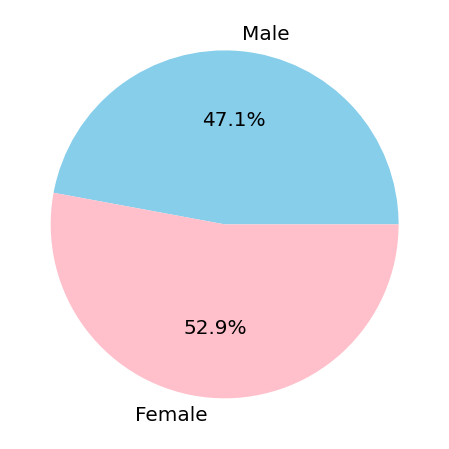

In [5]:
#%% Podjela prema polu
labele='Male','Female';
muski=((kartice["Gender"]=='M').sum())/velicina*100
zenske=((kartice["Gender"]=='F').sum())/velicina*100
velicine=[muski,zenske]

plt.figure(figsize=[8,8])
plt.pie(velicine,labels=labele,autopct='%1.1f%%', textprops={'fontsize': 20}, colors=['skyblue', 'pink'])

hide_toggle()

<h3>1.2 Raspodjela korisnika po godinama</h3>

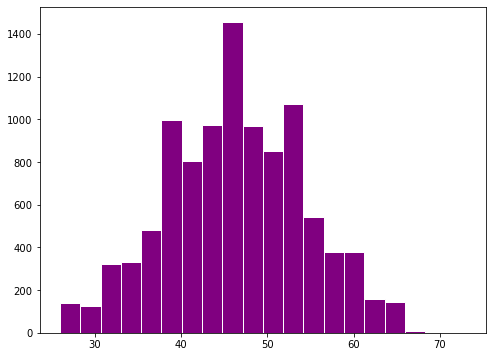

In [6]:
#%% Raspodjela godina
plt.figure(figsize=[8,6])

plt.hist(x=kartice['Customer_Age'], edgecolor='white', color='purple', bins=20)

hide_toggle()

<h3>1.3 Raspodjela korisnika po stepenu obrazovanja</h3>

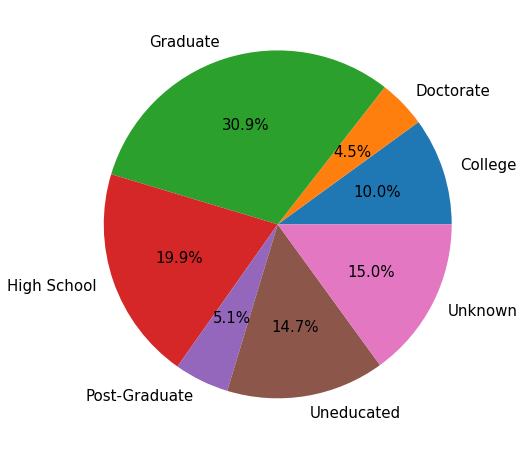

In [7]:
#%% Odnos obrazovanja
labele='High School','Graduate', 'Unknown', 'College', 'Uneducated', 'Post-Graduate', 'Doctorate';
labele = kartice["Education_Level"].unique()


plt.figure(figsize=[8,8])
plt.pie(kartice.groupby(["Education_Level"])["Education_Level"].count(),labels=sorted(labele),autopct='%1.1f%%', textprops={'fontsize': 15})

hide_toggle()

<h3>1.4 Raspodjela korisnika po statusu braka </h3>

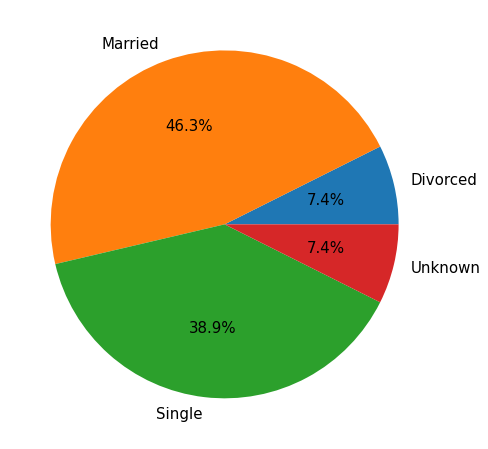

In [8]:
#%% Odnos statusa braka
labele = sorted(kartice["Marital_Status"].unique())


plt.figure(figsize=[8,8])
plt.pie(kartice.groupby(["Marital_Status"])["Marital_Status"].count(),labels=labele,autopct='%1.1f%%', textprops={'fontsize': 15})

hide_toggle()


<h3>1.5 Raspodjela korisnika po katergorijama prihoda</h3>

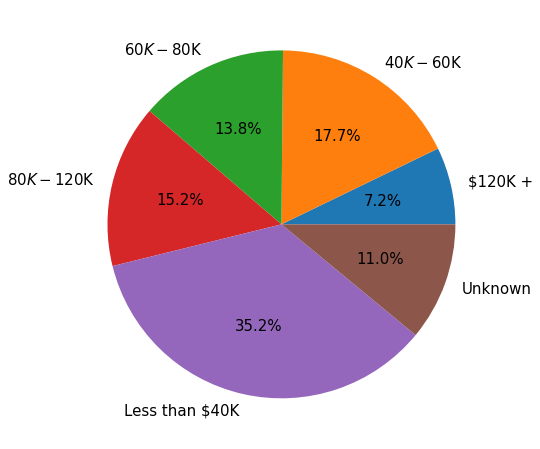

In [9]:
#%% Odnos primanja
labele = ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']


plt.figure(figsize=[8,8])
plt.pie(kartice.groupby(["Income_Category"])["Income_Category"].count(),labels=labele,autopct='%1.1f%%', textprops={'fontsize': 15})

hide_toggle()

<h2><center>2. Analiza korelacije socioloških aspekata<center></h2>

<h3>2.1 Raspodjela prihoda u zavisnosti od nivoa obrazovanja</h3>

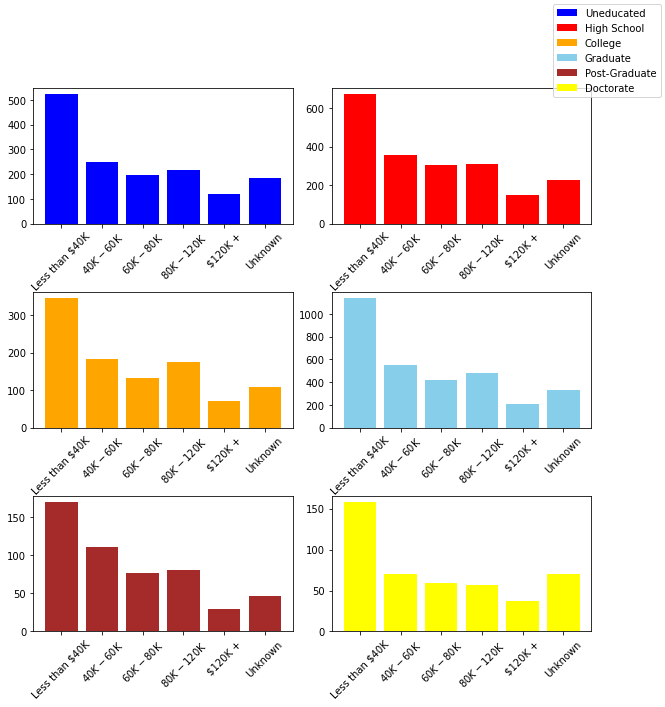

In [10]:
#%% Analiza primanja za sve kartice
fig, ax = plt.subplots(3, 2, figsize=[10,10])
fig.subplots_adjust(hspace=0.5, wspace=0.15)

labele = 'Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown';

uneducated=kartice.loc[kartice["Education_Level"]=="Uneducated"]
high_school=kartice.loc[kartice["Education_Level"]=="High School"]
college=kartice.loc[kartice["Education_Level"]=="College"]
graduate=kartice.loc[kartice["Education_Level"]=="Graduate"]
post_graduate=kartice.loc[kartice["Education_Level"]=="Post-Graduate"]
doctorate=kartice.loc[kartice["Education_Level"]=="Doctorate"]

uneducatedcol = uneducated.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
high_schoolcol = high_school.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
collegecol = college.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
graduatecol = graduate.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
post_graduatecol = post_graduate.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
doctoratecol = doctorate.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]

ax[0,0].bar(labele, uneducatedcol, color='blue', label = "Uneducated")
ax[0,1].bar(labele, high_schoolcol, color='red', label = "High School")
ax[1,0].bar(labele, collegecol, color='orange', label = "College")
ax[1,1].bar(labele, graduatecol, color='skyblue', label = "Graduate")
ax[2,0].bar(labele, post_graduatecol, color='brown', label = "Post-Graduate")
ax[2,1].bar(labele, doctoratecol, color='yellow', label = "Doctorate")

ax[0,0].tick_params('x', labelrotation=45)
ax[0,1].tick_params('x', labelrotation=45)
ax[1,0].tick_params('x', labelrotation=45)
ax[1,1].tick_params('x', labelrotation=45)
ax[2,0].tick_params('x', labelrotation=45)
ax[2,1].tick_params('x', labelrotation=45)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels)

hide_toggle()

<h3>2.2 Raspodjela prihoda razvedenih korisnika i onih u braku</h3>


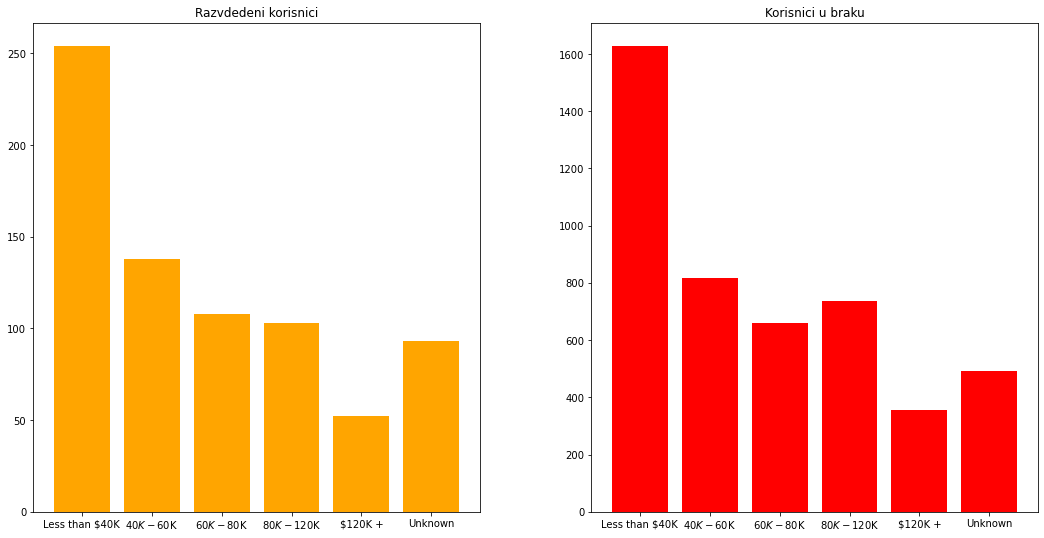

In [35]:
#%% Histogram primanja razvedenih ljudi
divorced = kartice.loc[kartice["Marital_Status"]=="Divorced", :]
divorcedcol = divorced.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
married = kartice.loc[kartice["Marital_Status"]=="Married", :]
marriedcol = married.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]

labele = 'Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown';

fig, ax = plt.subplots(1, 2, figsize=[18,9], sharex="all")
fig.subplots_adjust(hspace=0.5, wspace=0.25)
ax[0].bar(labele, divorcedcol, color='orange')
ax[1].bar(labele, marriedcol, color='red')
ax[0].title.set_text("Razvdedeni korisnici")
ax[1].title.set_text("Korisnici u braku")

hide_toggle()

<h3>2.3 Raspodjela po nivou obrazovanju za muškarce i žene</h3>

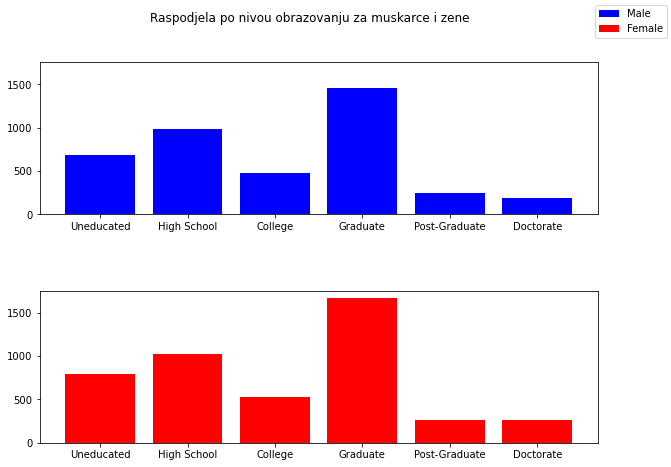

In [11]:
#%%  Podjela muskarci i zene po obrazovanju

labele = 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate';
male = kartice.loc[kartice["Gender"]=="M"]
female = kartice.loc[kartice["Gender"]=="F"]

malecol = male.Education_Level.value_counts().loc[['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']]
femalecol = female.Education_Level.value_counts().loc[['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']]

fig, ax = plt.subplots(2, 1, figsize=[10,7], sharey='all')
fig.subplots_adjust(hspace=0.5, wspace=0.15)
ax[0].bar(labele, malecol, color='blue', label = "Male")
ax[1].bar(labele, femalecol, color='red', label = "Female")

fig.suptitle("Raspodjela po nivou obrazovanju za muskarce i zene")
fig.legend()

hide_toggle()

<h3>2.4 Raspodjela broja transakcija za muškarce i žene</h3>

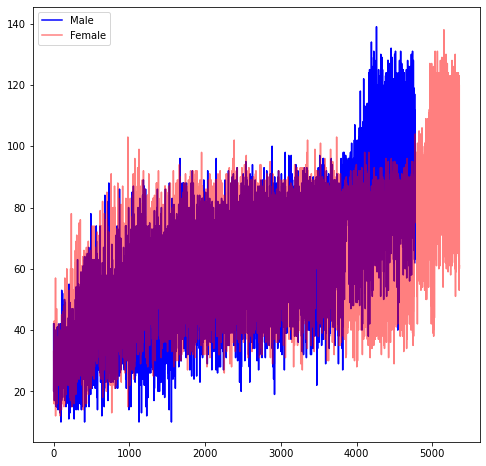

In [12]:
#%% Raspodjela broja transakcija za muskarce i zene

male = kartice.loc[kartice["Gender"]=="M"]
female = kartice.loc[kartice["Gender"]=="F"]

male["Total_Trans_Ct"].mean()
female["Total_Trans_Ct"].mean()

malex = np.arange(0, male["Total_Trans_Ct"].count(), 1)
femalex = np.arange(0, female["Total_Trans_Ct"].count(), 1)

plt.figure(figsize=[8,8])
plt.plot(malex, male["Total_Trans_Ct"], color='blue',label="Male")
plt.plot(femalex, female["Total_Trans_Ct"], color='red', alpha=0.5,label="Female")
plt.legend()
hide_toggle()


<h3>2.5 Prosječni i maksimalni broj transakcija za Dependent_count</h3>

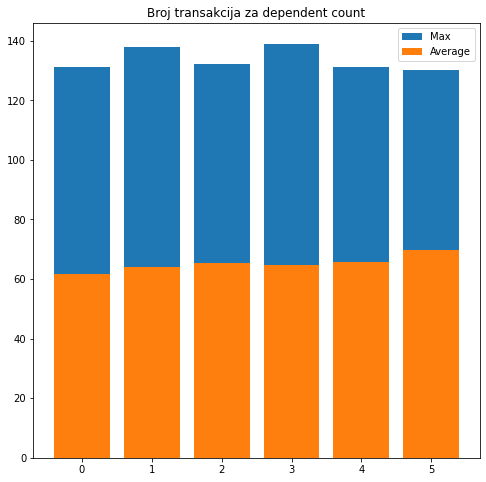

In [13]:
#%% Broj transakcija za dependent count
labele = '0', '1', '2', '3', '4', '5';

depmax = kartice.groupby("Dependent_count").agg({"Total_Trans_Ct":"max"})["Total_Trans_Ct"]
depmean = kartice.groupby("Dependent_count").agg({"Total_Trans_Ct":"mean"})["Total_Trans_Ct"]

plt.figure(figsize=[8,8])
plt.bar(labele, depmax, label="Max")
plt.bar(labele, depmean, label="Average")
plt.title("Broj transakcija za dependent count")
plt.legend()

hide_toggle()

<h2><center>3. Analiza podataka u zavisnosti od tipa kartice<center></h2>

<h3>3.1 Raspodjela korisnika po vrsti kartice koju posjeduju</h3>

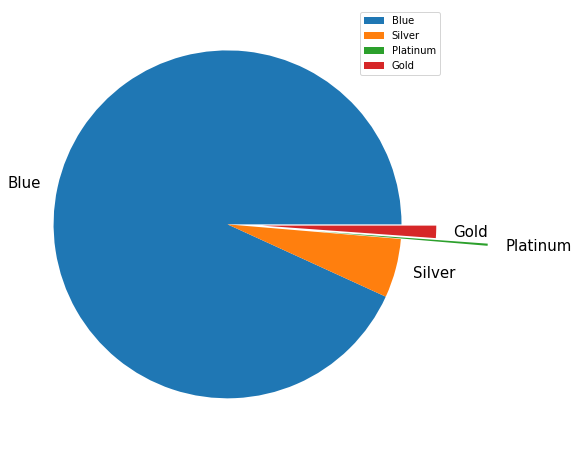

In [14]:
#%% Podjela na vrste kartica
labele1='Blue','Silver','Platinum','Gold';
blue=((kartice["Card_Category"]=='Blue').sum())/velicina*100
silver=((kartice["Card_Category"]=='Silver').sum())/velicina*100
platinum=((kartice["Card_Category"]=='Platinum').sum())/velicina*100
gold=((kartice["Card_Category"]=='Gold').sum())/velicina*100
explode=[0,0,0.5,0.2]

velicine1=[blue,silver,platinum,gold]
plt.figure(figsize=[8,8])

plt.pie(velicine1,labels=labele1,explode=explode, textprops={'fontsize': 15})
plt.legend()

hide_toggle()

<h3>3.2 Raspodjela nivoa prihoda za svaki tip kartice</h3>

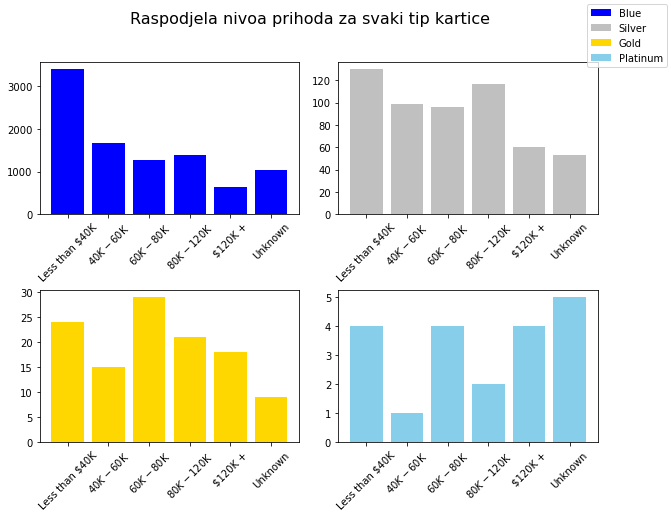

In [15]:
#%% Analiza primanja za sve kartice
blue=kartice.loc[kartice["Card_Category"]=="Blue"]
silver=kartice.loc[kartice["Card_Category"]=="Silver"]
gold=kartice.loc[kartice["Card_Category"]=="Gold"]
platinum=kartice.loc[kartice["Card_Category"]=="Platinum"]

labele = 'Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown';

bluecol = blue.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
silvercol = silver.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
goldcol = gold.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]
platcol = platinum.Income_Category.value_counts().loc[['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +', 'Unknown']]

fig, ax = plt.subplots(2, 2, figsize=[10,7])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
ax[0,0].bar(labele, bluecol, color='blue', label = "Blue")
ax[0,1].bar(labele, silvercol, color='silver', label = "Silver")
ax[1,0].bar(labele, goldcol, color='gold', label = "Gold")
ax[1,1].bar(labele, platcol, color='skyblue', label = "Platinum")
ax[0,0].tick_params('x', labelrotation=45)
ax[0,1].tick_params('x', labelrotation=45)
ax[1,0].tick_params('x', labelrotation=45)
ax[1,1].tick_params('x', labelrotation=45)


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels)
fig.suptitle("Raspodjela nivoa prihoda za svaki tip kartice",fontsize=16)
hide_toggle()

<h3>3.3 Prosječno trajanje ugovora sa bankom za sve tipove kartice</h3>


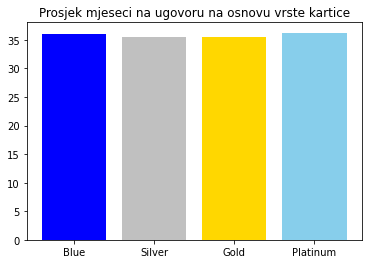

In [15]:
#%% Pogresna pretpostavka za prosjek mjeseci na ugovoru na osnovu vrste kartice
labele = 'Blue', 'Silver', 'Gold', 'Platinum'

blue=kartice.loc[kartice["Card_Category"]=="Blue"]
silver=kartice.loc[kartice["Card_Category"]=="Silver"]
gold=kartice.loc[kartice["Card_Category"]=="Gold"]
platinum=kartice.loc[kartice["Card_Category"]=="Platinum"]

bluecnt = blue["Months_on_book"].mean()
silvercnt = silver["Months_on_book"].mean()
goldcnt = gold["Months_on_book"].mean()
platinumcnt = platinum["Months_on_book"].mean()

cnt = [bluecnt, silvercnt, goldcnt, platinumcnt]

plt.figure()
plt.title("Prosjek mjeseci na ugovoru na osnovu vrste kartice")
plt.bar(labele, cnt, color=['blue', 'silver', 'gold', 'skyblue'])

hide_toggle()

<h3>3.4 Prikaz prosječnog kreditnog limita za svaki tip kartice</h3>

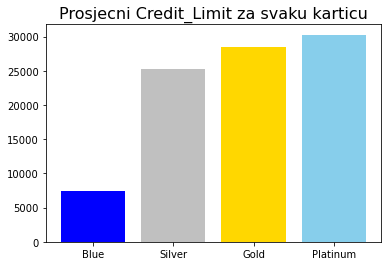

In [16]:
#%% Prosjecni Credit_Limit za svaku karticu
x = 'Blue', "Silver", "Gold", "Platinum"

blue=kartice.loc[kartice["Card_Category"]=="Blue"]
silver=kartice.loc[kartice["Card_Category"]=="Silver"]
gold=kartice.loc[kartice["Card_Category"]=="Gold"]
platinum=kartice.loc[kartice["Card_Category"]=="Platinum"]

goldmean = gold["Credit_Limit"].mean()
bluemean = blue["Credit_Limit"].mean()
platmean = platinum["Credit_Limit"].mean()
silvermean = silver["Credit_Limit"].mean()
height = [bluemean,  silvermean,goldmean, platmean]

plt.figure()
plt.bar(x, height, color=['blue', 'silver', 'gold', 'skyblue'])
plt.title("Prosjecni Credit_Limit za svaku karticu", fontsize=16)

hide_toggle()

<h3>3.5 Raspodjela prosječnog Utilization_Ratio za svaki tip kartice</h3>


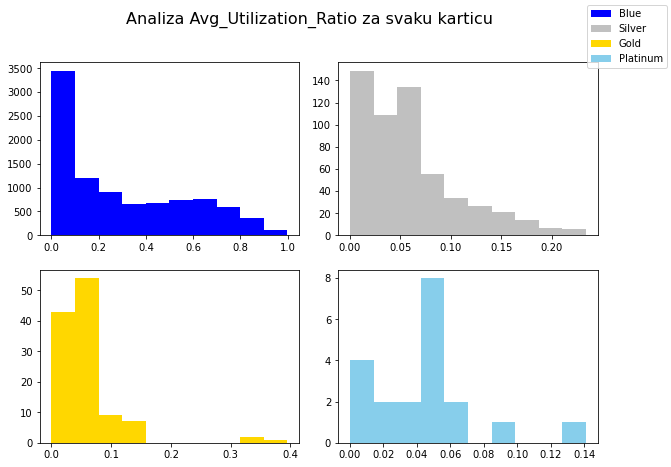

In [17]:
#%% Analiza Avg_Utilization_Ratio za svaku karticu

blue=kartice.loc[kartice["Card_Category"]=="Blue"]
silver=kartice.loc[kartice["Card_Category"]=="Silver"]
gold=kartice.loc[kartice["Card_Category"]=="Gold"]
platinum=kartice.loc[kartice["Card_Category"]=="Platinum"]


fig, ax = plt.subplots(2, 2, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0,0].hist(blue["Avg_Utilization_Ratio"], color='blue', label = "Blue")
ax[0,1].hist(silver["Avg_Utilization_Ratio"], color='silver', label = "Silver")
ax[1,0].hist(gold["Avg_Utilization_Ratio"], color='gold', label = "Gold")
ax[1,1].hist(platinum["Avg_Utilization_Ratio"], color='skyblue', label = "Platinum")

fig.suptitle("Analiza Avg_Utilization_Ratio za svaku karticu", fontsize=16)

hide_toggle()
fig.legend()

hide_toggle()

<h3>3.6 Prosječni Open_To_Buy za svaki tip kartice</h3>

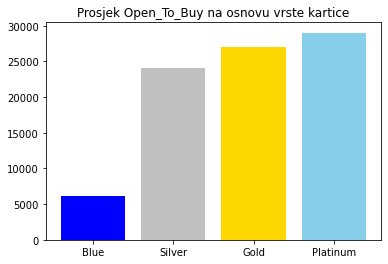

In [18]:
#%% Prosjek Open_To_Buy na osnovu vrste kartice
labele = 'Blue', 'Silver', 'Gold', 'Platinum'

blue=kartice.loc[kartice["Card_Category"]=="Blue"]
silver=kartice.loc[kartice["Card_Category"]=="Silver"]
gold=kartice.loc[kartice["Card_Category"]=="Gold"]
platinum=kartice.loc[kartice["Card_Category"]=="Platinum"]

bluecnt = blue["Avg_Open_To_Buy"].mean()
silvercnt = silver["Avg_Open_To_Buy"].mean()
goldcnt = gold["Avg_Open_To_Buy"].mean()
platinumcnt = platinum["Avg_Open_To_Buy"].mean()

cnt = [bluecnt, silvercnt, goldcnt, platinumcnt]

plt.figure()
plt.title("Prosjek Open_To_Buy na osnovu vrste kartice")
plt.bar(labele, cnt, color=['blue', 'silver', 'gold', 'skyblue'])

hide_toggle()

<h3>3.7 Raspodjela Total_Revolving_Bal na osnovu vrste kartice</h3>

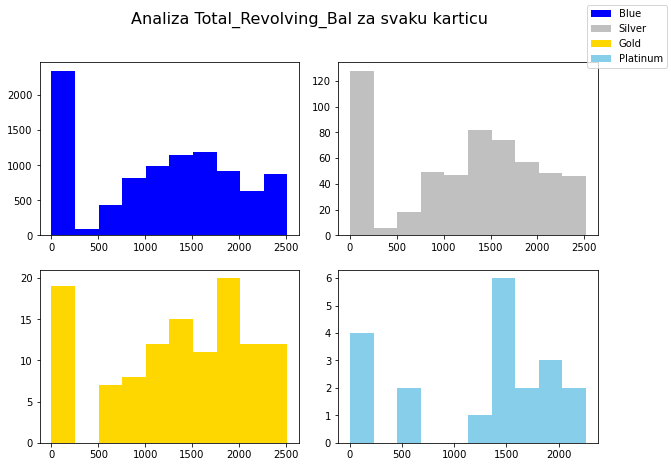

In [19]:
#%% Analiza Total_Revolving_Bal za svaku karticu

blue=kartice.loc[kartice["Card_Category"]=="Blue"]
silver=kartice.loc[kartice["Card_Category"]=="Silver"]
gold=kartice.loc[kartice["Card_Category"]=="Gold"]
platinum=kartice.loc[kartice["Card_Category"]=="Platinum"]


fig, ax = plt.subplots(2, 2, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0,0].hist(blue["Total_Revolving_Bal"], color='blue', label = "Blue")
ax[0,1].hist(silver["Total_Revolving_Bal"], color='silver', label = "Silver")
ax[1,0].hist(gold["Total_Revolving_Bal"], color='gold', label = "Gold")
ax[1,1].hist(platinum["Total_Revolving_Bal"], color='skyblue', label = "Platinum")

fig.suptitle("Analiza Total_Revolving_Bal za svaku karticu", fontsize=16)

hide_toggle()
fig.legend()

hide_toggle()

<h2><center>4. Analiza aktivnih i neaktivnih kosrisnika kartica<center></h2>

<h3>4.1 Raspodjela korisnika po aktivnosti</h3>

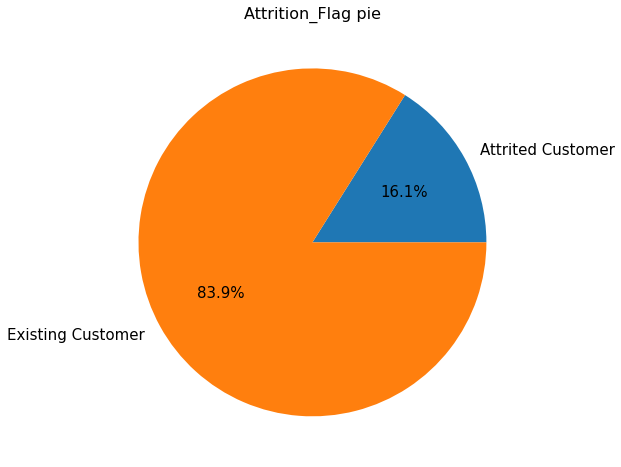

In [20]:
#%% Attrition_Flag pie
labele = kartice["Attrition_Flag"].unique()
attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]

velicine = [attrited["CLIENTNUM"].count(), existing["CLIENTNUM"].count()]

plt.figure(figsize=[8,8])
plt.pie(velicine, labels=sorted(labele), autopct='%1.1f%%', textprops={'fontsize': 15})

plt.title("Attrition_Flag pie", fontsize=16)

hide_toggle()

<h3>4.2 Raspodjela aktivnih i neaktivnih korisnika po polu</h3>

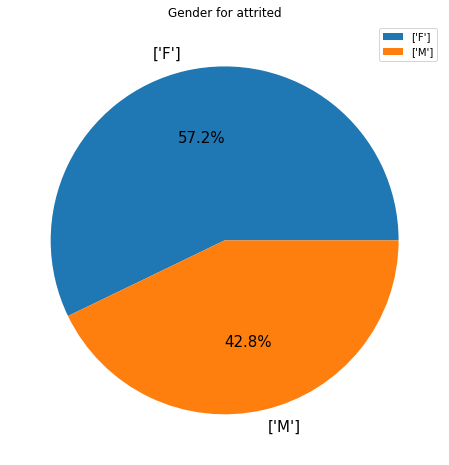

In [21]:
#%% Gender for attrited
attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
labeleAtt=attrited.groupby("Gender")["Gender"].unique();

plt.figure(figsize=[8,8])
plt.pie(attrited.groupby("Gender")["CLIENTNUM"].count(), labels = sorted(labeleAtt), autopct='%1.1f%%', textprops={'fontsize': 15})

plt.title("Gender for attrited")
plt.legend(loc="best")

hide_toggle()

<h3>4.3 Prikaz broja neaktivnih mjeseci u toku godine za aktivne i neaktivne korisnike</h3>

C:\Users\nata1\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


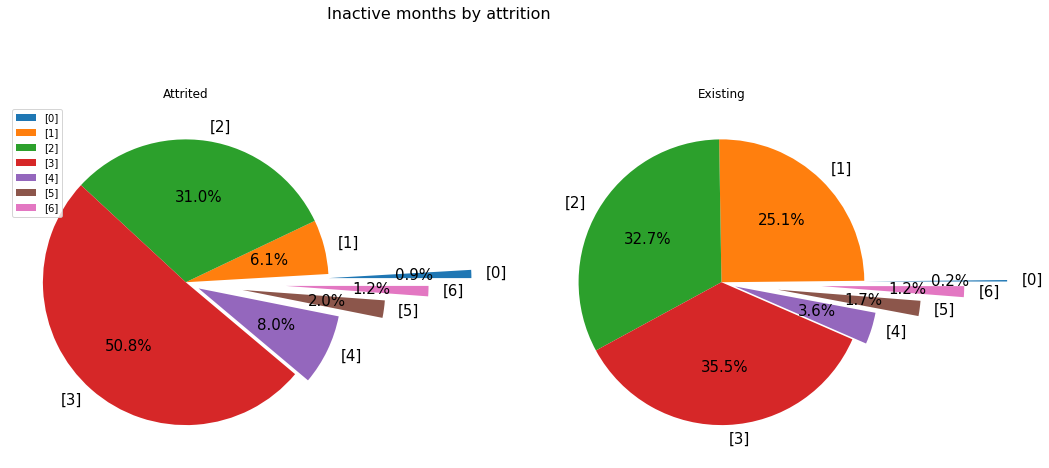

In [22]:
#%% Inactive months by attrition

attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]
labeleAtt=attrited.groupby("Months_Inactive_12_mon")["Months_Inactive_12_mon"].unique();
labeleEx=existing.groupby("Months_Inactive_12_mon")["Months_Inactive_12_mon"].unique();

fig, ax = plt.subplots(1, 2, figsize=[16,8])
fig.subplots_adjust(wspace=0.5)
explode=[1,0,0,0,0.1,0.4,0.7]

ax[0].pie(attrited.groupby("Months_Inactive_12_mon")["CLIENTNUM"].count(), labels = sorted(labeleAtt), autopct='%1.1f%%', explode = explode, textprops={'fontsize': 15})
ax[1].pie(existing.groupby("Months_Inactive_12_mon")["CLIENTNUM"].count(), labels = sorted(labeleEx), autopct='%1.1f%%', explode = explode, textprops={'fontsize': 15})
fig.suptitle("Inactive months by attrition", fontsize=16)
ax[0].legend(loc = 'upper left')

ax[0].set_title("Attrited")
ax[1].set_title("Existing")

hide_toggle()

<h3>4.4 Raspodjela ukupnog Revolving_balance za aktivne i neaktivne korisnike</h3>


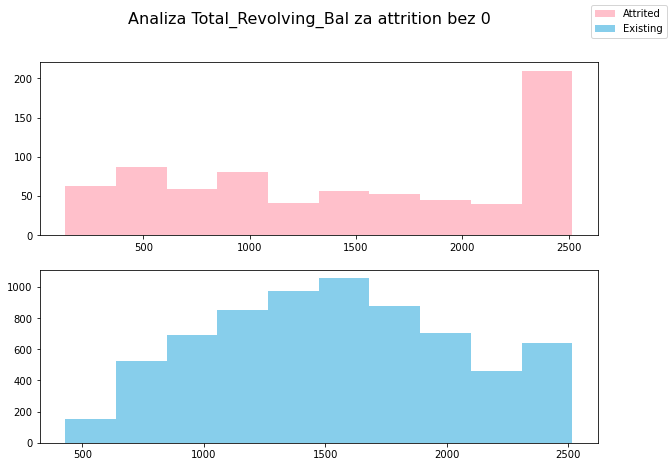

In [23]:
#%% Analiza Total_Revolving_Bal za attrition bez 0


attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]


fig, ax = plt.subplots(2, 1, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0].hist(attrited.loc[attrited["Total_Revolving_Bal"]!=0]["Total_Revolving_Bal"], color='pink', label = "Attrited")
ax[1].hist(existing.loc[existing["Total_Revolving_Bal"]!=0]["Total_Revolving_Bal"], color='skyblue', label = "Existing")

fig.suptitle("Analiza Total_Revolving_Bal za attrition bez 0", fontsize=16)
fig.legend()

hide_toggle()

<h3>4.5 Raspodjela prosječnog Open_To_Buy za aktivne i neaktivne korisnike<h3>

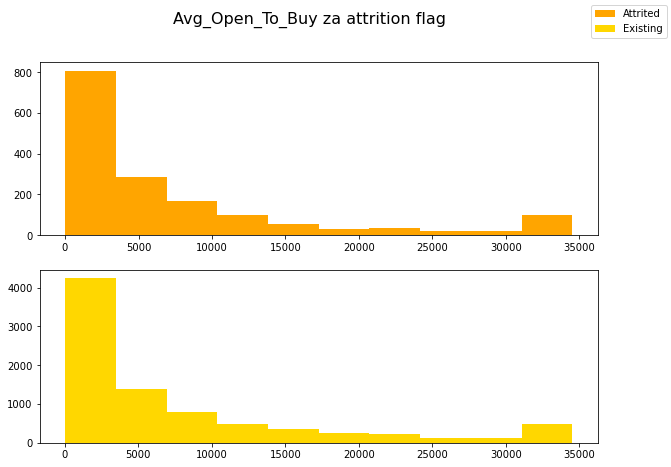

In [24]:
#%% Avg_Open_To_Buy za attrition flag

attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]

fig, ax = plt.subplots(2, 1, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0].hist(attrited["Avg_Open_To_Buy"], color='orange', label = "Attrited")
ax[1].hist(existing["Avg_Open_To_Buy"], color='gold', label = "Existing")

fig.suptitle("Avg_Open_To_Buy za attrition flag", fontsize=16)
fig.legend()

hide_toggle()

<h3>4.6 Raspodjela ukupnog Amt_Chng_Q4_Q1 za aktivne i neaktivne korisnike<h3>

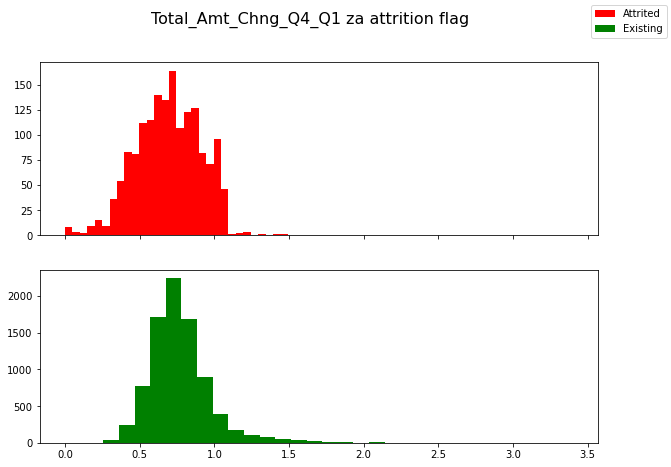

In [25]:
#%% Avg_Open_To_Buy za attrition flag

attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]

fig, ax = plt.subplots(2, 1, figsize=[10,7], sharex='all')
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0].hist(attrited["Total_Amt_Chng_Q4_Q1"], color='red', label = "Attrited", bins = 30)
ax[1].hist(existing["Total_Amt_Chng_Q4_Q1"], color='green', label = "Existing", bins = 30)

fig.suptitle("Total_Amt_Chng_Q4_Q1 za attrition flag", fontsize=16)
fig.legend()

hide_toggle()

<h3>4.7 Raspodjela ukupnog Ct_Chng_Q4_Q1 za aktivne i neaktivne korisnike<h3>

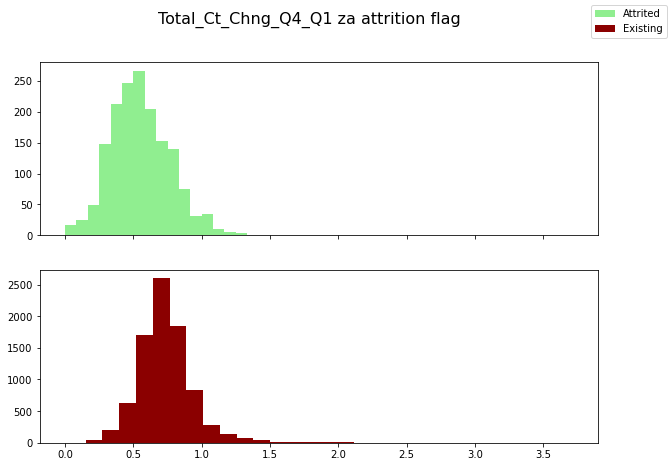

In [26]:
#%% Total_Ct_Chng_Q4_Q1 za attrition flag

attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]


fig, ax = plt.subplots(2, 1, figsize=[10,7], sharex='all')
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0].hist(attrited["Total_Ct_Chng_Q4_Q1"], color='lightgreen', label = "Attrited", bins = 30)
ax[1].hist(existing["Total_Ct_Chng_Q4_Q1"], color='darkred', label = "Existing", bins = 30)

fig.suptitle("Total_Ct_Chng_Q4_Q1 za attrition flag", fontsize=16)
fig.legend()

hide_toggle()

<h3>4.8 Raspodjela ukupnog broja transakcija za aktivne i neaktivne korisnike<h3>

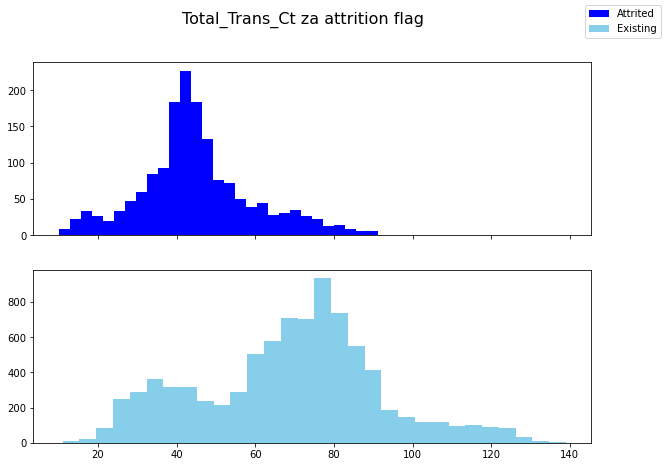

In [27]:
#%% Total_Trans_Ct za attrition flag

attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]


fig, ax = plt.subplots(2, 1, figsize=[10,7], sharex='all')
fig.subplots_adjust(hspace=0.2, wspace=0.15)

ax[0].hist(attrited["Total_Trans_Ct"], color='blue', label = "Attrited", bins = 30)
ax[1].hist(existing["Total_Trans_Ct"], color='skyblue', label = "Existing", bins = 30)

fig.suptitle("Total_Trans_Ct za attrition flag", fontsize=16)
fig.legend()

hide_toggle()

<h3>4.9 Prikaz broja transakcija u odnosu na količinu transakcija </h3>

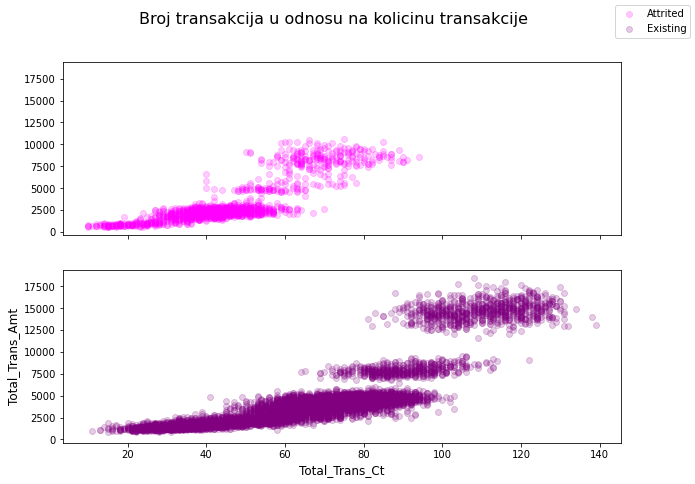

In [28]:
#%% Broj transakcija -x kolicina transakcije -y
attrited = kartice.loc[kartice["Attrition_Flag"]=="Attrited Customer"]
existing = kartice.loc[kartice["Attrition_Flag"]=="Existing Customer"]

fig, ax = plt.subplots(2, 1, figsize=[10,7], sharex='all', sharey='all')
fig.subplots_adjust(wspace=0.15)

ax[0].scatter(attrited["Total_Trans_Ct"], attrited["Total_Trans_Amt"], color='magenta', label="Attrited", alpha=0.2)
ax[1].scatter(existing["Total_Trans_Ct"], existing["Total_Trans_Amt"], color='purple', label="Existing", alpha=0.2)
ax[1].set_xlabel("Total_Trans_Ct",fontsize=12)
ax[1].set_ylabel("Total_Trans_Amt",fontsize=12)

fig.suptitle("Broj transakcija u odnosu na kolicinu transakcije", fontsize=16)
fig.legend()

hide_toggle()

<h3>4.10 Prikaz odnosa ukupnog Revolving_Balance i prosječnog Utilization_Ratio<h3>

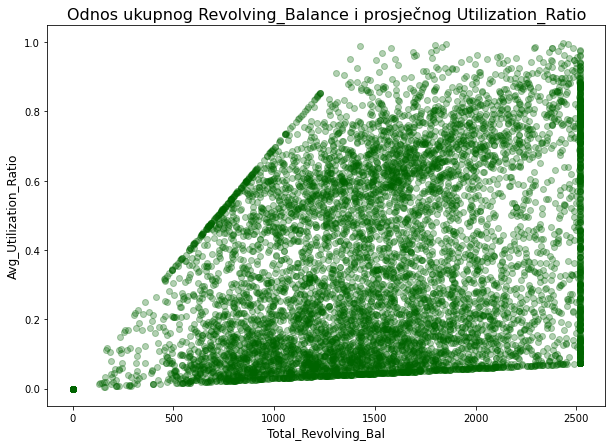

In [29]:
#%% x-Total_Revolving_Bal, y-Avg_Utilization_Ratio

xatt = kartice["Total_Revolving_Bal"]
yatt = kartice["Avg_Utilization_Ratio"]
clr = kartice["Total_Revolving_Bal"].values
plt.figure(figsize=[10,7])
plt.scatter(xatt, yatt, color="darkgreen", alpha=0.3)
plt.title("Odnos ukupnog Revolving_Balance i prosječnog Utilization_Ratio",fontsize=16)
plt.xlabel("Total_Revolving_Bal",fontsize=12)
plt.ylabel("Avg_Utilization_Ratio",fontsize=12)

hide_toggle()